## Problem 2
### Paradoxes in Single Modal Fixed Demand Network (2)
Lecture note 17, page 14-15

In [20]:
# Import packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

Three-link Network

3-link network:


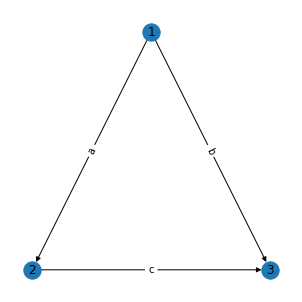

In [21]:
nodes={1:(1,1),2:(0,0),3:(2,0)}
links={'a':(1,2),'b':(1,3),'c':(2,3)}
# Create the network based on networkx
G=nx.DiGraph()
# Add nodes
for node in nodes.items():
    G.add_node(node[0],pos=node[1])
# Add edges
for i in links.keys():
    G.add_edge(links[i][0],links[i][1],link=i)
# Plot the network
pos=nx.get_node_attributes(G,'pos') # The positions of each node
link_index=nx.get_edge_attributes(G,'link') # The edge index
plt.figure(figsize=(4,4))
nx.draw(G, pos, node_size=300, with_labels=True)
nx.draw_networkx_edge_labels(G, pos,edge_labels=link_index) # Draw the edge labels
print('3-link network:')

In [22]:
# Link travel time function
t_a = lambda x: x+1
t_b = lambda x: x+4
t_c = lambda x: x+1

# Emission factor
h_a = 0.01
h_b = 0.01
h_c = 0.5

# Demand
q_12 = 1
q_13 = 2

In [23]:
f1 = q_12
guess = (1,1)
f = lambda f2,f3: np.array([
    f2+f3-q_13,
    t_a(f1+f2)+t_c(f2) - t_b(f3)
])
[f2,f3]=opt.least_squares(lambda x: f(x[0],x[1]),x0=guess, bounds=((0,0),(np.inf,np.inf))).x
x_a=f1+f2
x_b=f3
x_c=f2

In [24]:
print('The equilibrium flow on link a and b, and c is respectively:', 
np.round(x_a,1), np.round(x_b,1), 'and', np.round(x_c,1))
print('The equilibrium paths time is:', np.round(t_a(x_a)+t_c(x_c),1))
print('The total emissions are:', np.round(h_a*x_a+h_b*x_b+h_c*x_c,1))

The equilibrium flow on link a and b, and c is respectively: 2.0 1.0 and 1.0
The equilibrium paths time is: 5.0
The total emissions are: 0.5


Reduced Demand

In [25]:
# Demand
q_12 = 0.5
q_13 = 2

In [26]:
f1 = q_12
guess = (1,1)
f = lambda f2,f3: np.array([
    f2+f3-q_13,
    t_a(f1+f2)+t_c(f2) - t_b(f3)
])
[f2,f3]=opt.least_squares(lambda x: f(x[0],x[1]),x0=guess, bounds=((0,0),(np.inf,np.inf))).x
x_a=f1+f2
x_b=f3
x_c=f2

In [27]:
print('The equilibrium flow on link a and b, and c is respectively:', 
np.round(x_a,3), np.round(x_b,3), 'and', np.round(x_c,3))
print('The equilibrium paths time is:', np.round(t_a(x_a)+t_c(x_c),1))
print('The total emissions are:', np.round(h_a*x_a+h_b*x_b+h_c*x_c,3))

The equilibrium flow on link a and b, and c is respectively: 1.667 0.833 and 1.167
The equilibrium paths time is: 4.8
The total emissions are: 0.608
